Slouzi k rychlemu pohledu na namereny histogram

In [18]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [17]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

In [9]:
import numpy as np
from EMM_min_func import get_hist_fit_single
## single fotkor signal
####################### vstup

# data z picoharpu ve formatu: array(  ) sloupce: jednotlive histogramy -- posledni radek nula
# [data jednotlivych hist, cislo histogramy]
fotkor = np.genfromtxt("03_05_20_axial_EMM_min_citlivost_test_delim.txt", delimiter="\t")[:,0] # signal bez MM 

# pomocne promene
fotkor_shape = np.shape(fotkor)
print(fotkor_shape)
# print(fotkor)
# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = 85 # doba nacitani dat v s
hist_sigmas = 86
background_photocounts = 190





(132,)


In [10]:
DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, t_scale = get_hist_fit_single(fotkor, t_res, t_measure, background_photocounts, hist_sigmas,
                                                                                                     phi0=0.5 )

print(DeltaS_S_ratio)
print(Delta_S_S_ratio_sigma)
print(fot_phi)
print(fot_phi_sigma)


0.00858339318448138
0.0056958581497544404
-0.876960337255295
0.6643539985589346


Text(3e-08, 6229.707927401723, '$\\varphi  = -1.42751$')

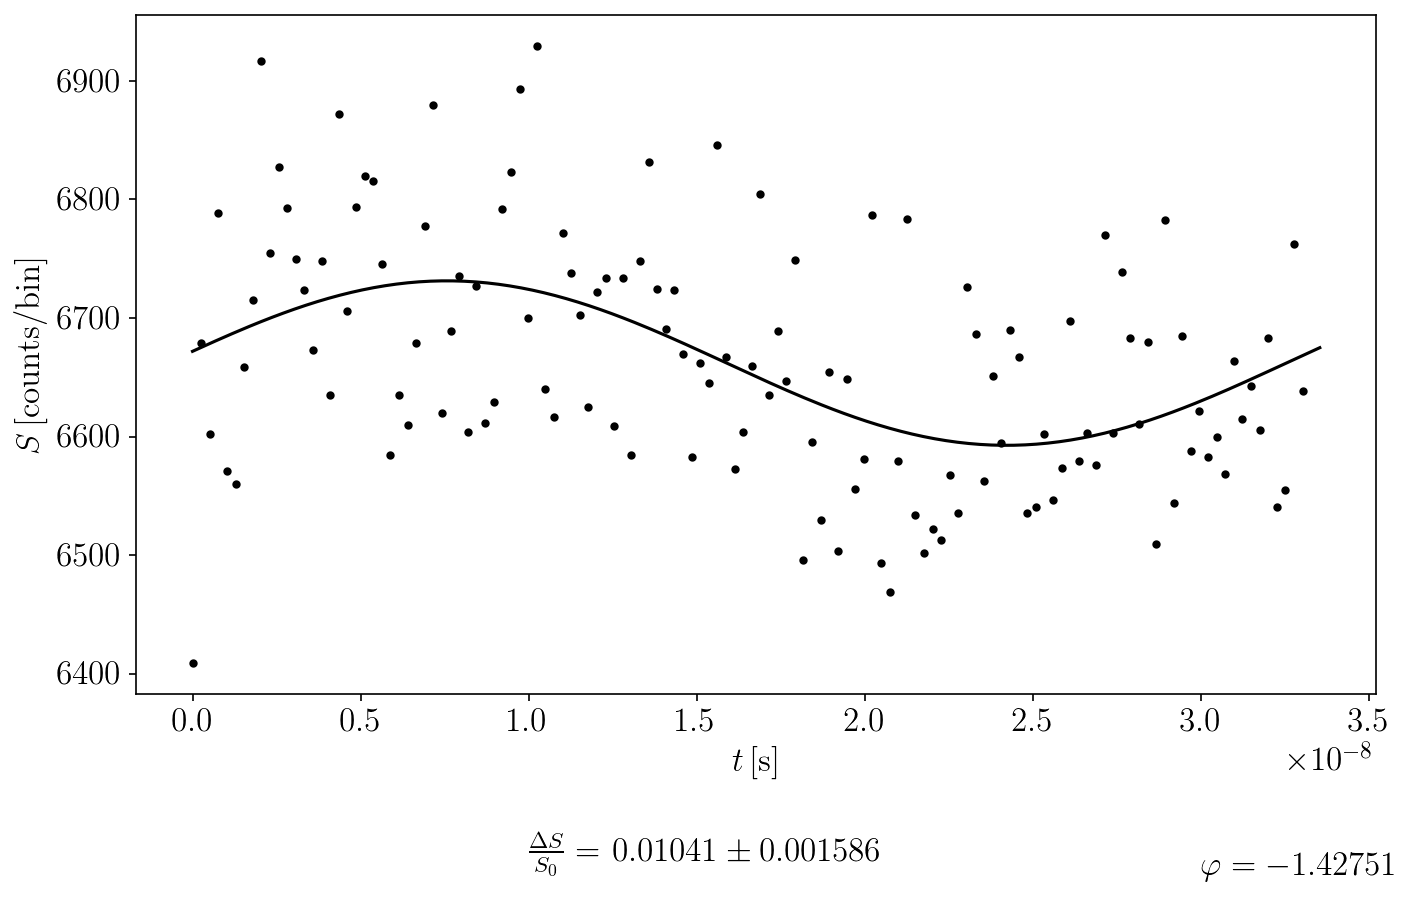

In [213]:
from EMM_min_func import get_hist_fit_values

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
# colors=('black', 'red')

time_fit, fotkor_fit = get_hist_fit_values(t_scale, x, Omega)


#     plt.errorbar(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],yerr=hist_sigma[i],fmt='.')
plt.plot(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2],'.', color='black')
plt.plot(time_fit, fotkor_fit, color='black')

plt.xlabel(r"$t \,\rm [s]$")
plt.ylabel(r"$S \, \rm [counts/bin]$")
text = r'$\frac{\Delta S}{S_0}  = \,\,$' + r'${:.5f} \pm {:.6f}$'.format(DeltaS_S_ratio, Delta_S_S_ratio_sigma)
plt.text(1e-8, fotkor.max()-700,text) 
text2 = r'$\varphi  = {:.5f}$'.format(fot_phi)
plt.text(3e-8, fotkor.max()-700,text2) 

In [24]:
## multiple
####################### vstup
import numpy as np
from EMM_min_func import get_hist_fit_single
# data z picoharpu ve formatu: array(  ) sloupce: jednotlive histogramy -- posledni radek nula
# [data jednotlivych hist, cislo histogramy]
fotkor = np.genfromtxt("03_05_20_axial_EMM_min_citlivost_test_delim.txt", delimiter="\t")[:,:-1] # signal bez MM 

# pomocne promene
fotkor_shape = np.shape(fotkor)
print(fotkor_shape)
# parametry odecitani foton-korelacnich dat
# t_res = 256e-12  # casove rozliseni histogramu v s
# t_measure = 150 # doba nacitani dat v s
# hist_sigmas = 86
# background_photocounts = 400

t_res = [256e-12, 256e-12, 256e-12, 256e-12, 256e-12, 256e-12]  # casove rozliseni histogramu v s
t_measure = [85, 80, 75, 80, 80, 80] # doba nacitani dat v s
hist_sigmas = [86, 86, 86, 86, 86, 86]
background_photocounts = [190, 180, 180, 180, 180, 180]


DeltaS_S_ratio = np.zeros(fotkor_shape[1])
Delta_S_S_ratio_sigma = np.zeros(fotkor_shape[1])
fot_phi = np.zeros(fotkor_shape[1])
fot_phi_sigma = np.zeros(fotkor_shape[1])
x = np.zeros((3,fotkor_shape[1]))
Omega = np.zeros(fotkor_shape[1])
Omega_sigma = np.zeros(fotkor_shape[1])
nu = np.zeros(fotkor_shape[1])
t_scale = np.zeros(fotkor_shape)

for i in range(fotkor_shape[1]):
#     get_hist_fit_single(fotkor[:-2,i], t_res, t_measure[i], 0, hist_sigmas[i] )
    DeltaS_S_ratio[i], Delta_S_S_ratio_sigma[i], fot_phi[i], fot_phi_sigma[i], x[:,i], Omega[i], t_scale[:,i] = get_hist_fit_single(fotkor[:,i], t_res[i], t_measure[i], background_photocounts[i], hist_sigmas[i],
                                                                                                     phi0=0.5 )
    
print(DeltaS_S_ratio)
print(Delta_S_S_ratio_sigma)
print(fot_phi)
print(fot_phi_sigma)

(132, 6)
[0.00858339 0.01425948 0.01344695 0.01729913 0.00859723 0.01343565]
[0.00569586 0.00526573 0.00559172 0.00547876 0.00570841 0.00565818]
[-0.87696034 -0.95099578 -1.32296665 -1.40900822 -1.0429747  -1.60950672]
[0.664354   0.36806452 0.41372543 0.31629689 0.66358521 0.42061209]


IndexError: tuple index out of range

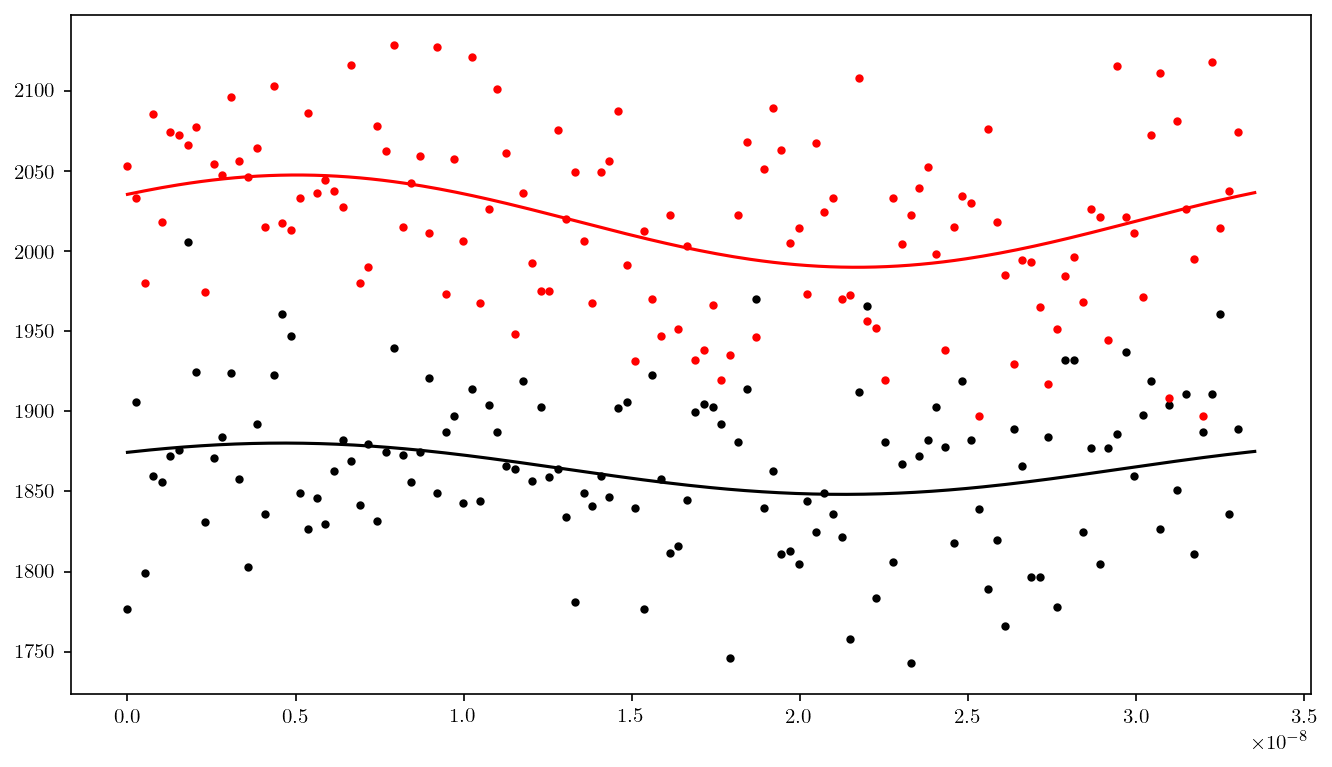

In [25]:
from EMM_min_func import get_hist_fit_values

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
colors=('black', 'red')
for i in range(fotkor_shape[1]):
    time_fit, fotkor_fit = get_hist_fit_values(t_scale[:,i], x[:,i], Omega[i])


#     plt.errorbar(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],yerr=hist_sigma[i],fmt='.')
    plt.plot(t_scale[:fotkor_shape[0]-2, i],fotkor[:fotkor_shape[0]-2, i],'.', color=colors[i])
    plt.plot(time_fit, fotkor_fit, color=colors[i])

plt.xlabel(r"$t \,\rm [s]$")
plt.ylabel(r"$S \, \rm [counts/bin]$")

Text(0, 0.5, '$S \\, \\rm [counts/bin]$')

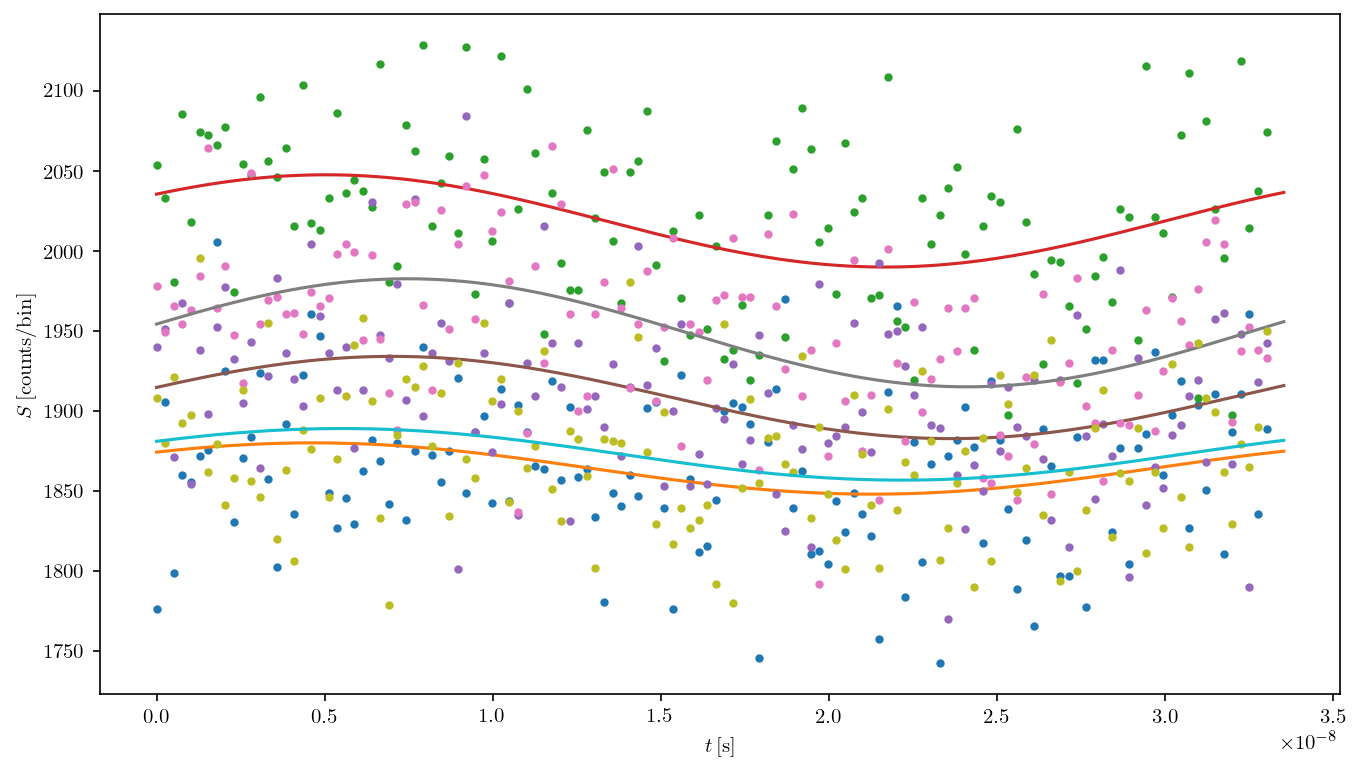

In [23]:
from EMM_min_func import get_hist_fit_values

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
# colors=('black', 'red')
for i in range(fotkor_shape[1]):
    time_fit, fotkor_fit = get_hist_fit_values(t_scale[:,i], x[:,i], Omega[i])


#     plt.errorbar(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],yerr=hist_sigma[i],fmt='.')
    plt.plot(t_scale[:fotkor_shape[0]-2, i],fotkor[:fotkor_shape[0]-2, i],'.')
    plt.plot(time_fit, fotkor_fit)

plt.xlabel(r"$t \,\rm [s]$")
plt.ylabel(r"$S \, \rm [counts/bin]$")

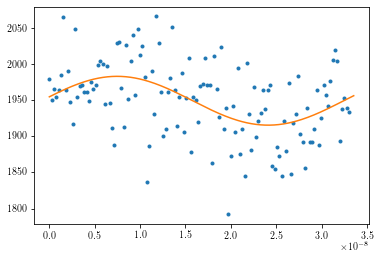

In [20]:
k=3
time_fit, fotkor_fit = get_hist_fit_values(t_scale[:,k], x[:,k], Omega[k])


#     plt.errorbar(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],yerr=hist_sigma[i],fmt='.')
plt.plot(t_scale[:fotkor_shape[0]-2, k],fotkor[:fotkor_shape[0]-2, k],'.')
plt.plot(time_fit, fotkor_fit)